The press freedom index released by Reporters Without Borders every year since 2002 represents the degree of freedom of the press in 180 countries. According to Reporters Without Borders, Press freedom has been threathened even now. A lot of journalists in many fields have been killed over the world every year. From this issue, I got a research question - What factors influence most to decide Press Freedom Index?

For this project, I got __'Journalists Killed Worldwide Since 1992' dataset__ from https://www.kaggle.com/cpjournalists/journalists-killed-worldwide-since-1992 and __'World Press Freedom' dataset__ from https://ourworldindata.org/grapher/world-press-freedom?time=2019

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Two Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data_Analysis/datasets/world-press-freedom.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data_Analysis/datasets/cpj.csv')

In [3]:
df = pd.DataFrame(df.groupby(['Entity'])['Press Freedom Score'].mean()).reset_index()
df['Press Freedom Score'] = df['Press Freedom Score'].astype(int)
df.columns = ['Country_killed', 'Press Freedom Score']

In [4]:
# low score = good score
df.sort_values(by = 'Press Freedom Score').head(5)

,Country_killed,Press Freedom Score
122,Norway,7
154,Sweden,8
55,Finland,9
114,Netherlands,9
79,Jamaica,11


In [5]:
# high score = bad score
df.sort_values(by = 'Press Freedom Score').tail(5)

,Country_killed,Press Freedom Score
156,Syria,77
32,China,78
50,Eritrea,82
167,Turkmenistan,84
119,North Korea,86


In [6]:
df2 = df2[['Type', 'Name', 'Sex', 'Country_killed', 'Organization',
       'Nationality', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Source_fire', 'Type_death']]
df2.columns = ['Type', 'Name', 'Sex', 'Country_killed', 'Organization',
       'Journalist_nationality', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Source_fire', 'Type_death']

In [7]:
# Combine two dataframes on 'Country_killed'
combined = pd.merge(df2, df, how = 'inner', on = 'Country_killed')
combined.dropna(how='any', axis = 0, inplace = True)

In [8]:
combined.head()

,Type,Name,Sex,Country_killed,Organization,Journalist_nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Press Freedom Score
0,Motive Confirmed,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,54
1,Motive Confirmed,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,54
2,Motive Confirmed,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,54
3,Motive Confirmed,Hassan al-Anbaki,Male,Iraq,Al-Sharqiya,Iraq,Television,Camera Operator,War,No,Local,Unknown Fire,Murder,54
4,Motive Confirmed,Saif Talal,Male,Iraq,Al-Sharqiya,Iraq,Television,Broadcast,War,No,Local,Unknown Fire,Murder,54


In [9]:
# for avoiding overfitting, deleted 'Country_killed' and 'Journalist_nationality'
combined.drop(['Name','Organization','Source_fire','Type_death','Country_killed', 'Journalist_nationality'], axis = 1, inplace = True)
combined.reset_index(drop=True, inplace = True)

In [10]:
combined.head() # 1085 rows

,Type,Sex,Medium,Job,Coverage,Freelance,Local_Foreign,Press Freedom Score
0,Motive Confirmed,Male,"Television, Internet",Camera Operator,War,No,Local,54
1,Motive Confirmed,Male,Television,Producer,"Politics, War",No,Local,54
2,Motive Confirmed,Male,Television,Camera Operator,War,No,Local,54
3,Motive Confirmed,Male,Television,Camera Operator,War,No,Local,54
4,Motive Confirmed,Male,Television,Broadcast,War,No,Local,54


# One-Hot Encoding

In [11]:
encoded_df = pd.get_dummies(combined)
encoded_df.head()

,Press Freedom Score,Type_Media Workers,Type_Motive Confirmed,Sex_Female,Sex_Male,Medium_Internet,Medium_Print,"Medium_Print, Internet","Medium_Print, Radio","Medium_Print, Radio, Internet",...,"Coverage_Human Rights, Politics, War","Coverage_Human Rights, War",Coverage_Politics,"Coverage_Politics, War",Coverage_Sports,Coverage_War,Freelance_No,Freelance_Yes,Local_Foreign_Foreign,Local_Foreign_Local
0,54,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,54,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,54,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,54,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,54,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


# Train/Test Dataset

In [12]:
X = encoded_df.drop(['Press Freedom Score'], axis = 1)
y = encoded_df['Press Freedom Score']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# RandomForest

In [14]:
# RandomForest Regression 
rf_reg = RandomForestRegressor(n_estimators = 1000, criterion = 'mse')
rf_reg.fit(X_train, y_train)
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

print('MSE Train: %.3f, test: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))
print('R2 Train: %.3f, test: %.3f' % (
r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred)))

MSE Train: 44.870, test: 127.919
R2 Train: 0.749, test: 0.268


# Important Features

[('Medium_Internet', 0.11381303668282043),
 ('Medium_Television, Internet', 0.07369015133321653),
 ('Medium_Television', 0.06210261076243205),
 ('Coverage_Human Rights, Politics, War', 0.05998403225393325),
 ('Coverage_War', 0.030465101833283503),
 ('Coverage_Politics', 0.02343151870381811),
 ('Coverage_Crime', 0.023355989539786015),
 ('Coverage_Human Rights, War', 0.02133501716870097),
 ('Job_Broadcast', 0.021118113690328275),
 ('Freelance_No', 0.02005440156659907)]

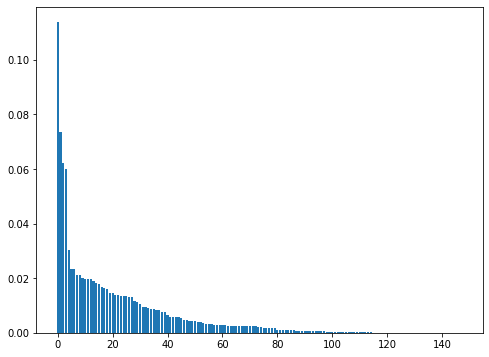

In [15]:
plt.figure(figsize=(8, 6)) 

importance = rf_reg.feature_importances_
indices = np.argsort(importance)[::-1]
plt.bar(range(X.shape[1]), importance[indices])

feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, rf_reg.feature_importances_))
sorted(feature, key = lambda tup: tup[1], reverse = True)[:10]

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

# create a function to encode categorical data
def encode_features(dataDF):
    features = ['Type', 'Sex', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Press Freedom Score']
    for feature in features:
        le = LabelEncoder()
        le.fit(combined[feature])
        combined[feature] = le.transform(combined[feature])
    return dataDF

In [17]:
encoded_df = encode_features(combined)

In [18]:
encoded_df 

,Type,Sex,Medium,Job,Coverage,Freelance,Local_Foreign,Press Freedom Score
0,1,1,13,21,63,0,1,31
1,1,1,12,58,61,0,1,31
2,1,1,12,21,63,0,1,31
3,1,1,12,21,63,0,1,31
4,1,1,12,0,63,0,1,31
...,...,...,...,...,...,...,...,...
1077,1,1,1,56,50,0,1,28
1078,1,1,12,9,50,0,0,31
1079,1,1,10,0,56,0,1,31
1080,1,1,1,44,20,0,1,5


# Train/Test Dataset

In [19]:
X = encoded_df.drop(['Press Freedom Score'], axis = 1)
y = encoded_df['Press Freedom Score']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Random Forest

In [21]:
# RandomForest Regression
rf_reg = RandomForestRegressor(n_estimators = 1000, criterion = 'mse')

# fit/train
rf_reg.fit(X_train, y_train)
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

print('MSE Train: %.3f, test: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))
print('R2 Train: %.3f, test: %.3f' % (
r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred)))

MSE Train: 19.560, test: 60.259
R2 Train: 0.728, test: 0.132


# Important Features

[('Coverage', 0.3869591280829581),
 ('Medium', 0.28763437493619143),
 ('Job', 0.20487899560008052),
 ('Freelance', 0.04833846397868829),
 ('Local_Foreign', 0.040615976052768205),
 ('Sex', 0.03157003629551753),
 ('Type', 3.0250537959550515e-06)]

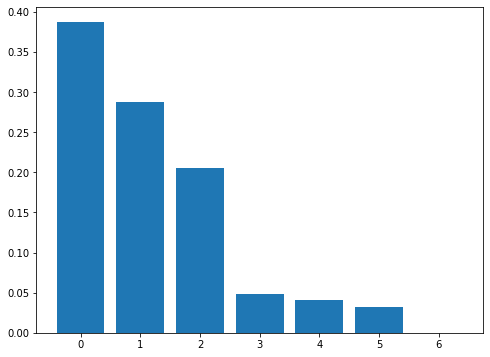

In [22]:
plt.figure(figsize=(8, 6)) 

importance = rf_reg.feature_importances_
indices = np.argsort(importance)[::-1]
plt.bar(range(X.shape[1]), importance[indices])

feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, rf_reg.feature_importances_))
sorted(feature, key = lambda tup: tup[1], reverse = True)[:10]

# DataRobot

### Analysis from DataRobot - eXtreme Gradient Boosted Trees Regressor model

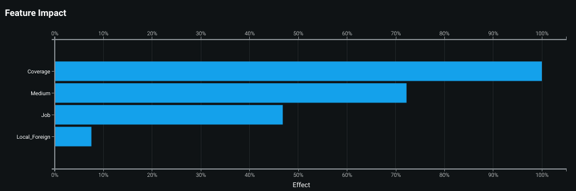

In [24]:
Image('FeatureImpacts.png')

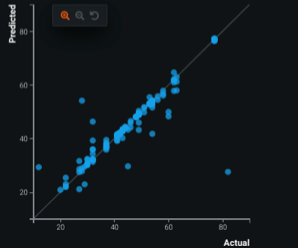

In [25]:
Image('Linear.png')